In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digital-green-crop-yield-estimate-zindi/Train (5).csv
/kaggle/input/digital-green-crop-yield-estimate-zindi/SampleSubmission (1).csv
/kaggle/input/digital-green-crop-yield-estimate-zindi/Test (1).csv


In [12]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
train=pd.read_csv("/kaggle/input/digital-green-crop-yield-estimate-zindi/Train (5).csv")
train

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,ID_7ZZQ6R4XB4FK,Nalanda,Rajgir,28,28,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-02,6,LineSowingAfterTillage,2022-06-29,...,machine,2022-11-29,NaN,2022-12-14,machine,25,40,plowed_in_soil,0.375000,720
3866,ID_PVVDF6LK6FO8,Vaishali,Mahua,5,5,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-06,5,Manual_PuddledRandom,2022-07-08,...,hand,2022-10-10,4.0,2022-11-05,hand,30,10,plowed_in_soil,0.136364,250
3867,ID_RBYVUPRATVMW,Nalanda,Noorsarai,50,45,TractorPlough,2022-07-07,5,Manual_PuddledRandom,2022-06-15,...,hand,2022-10-20,1200.0,2022-10-30,hand,25,10,plowed_in_soil,0.375000,600
3868,ID_ARE9QWENJNJ2,Jamui,Khaira,20,20,TractorPlough,2022-07-12,3,Manual_PuddledRandom,2022-06-28,...,hand,2022-11-09,100.0,2022-12-10,hand,25,10,plowed_in_soil,0.227273,400


In [14]:
#최솟값찾기
train["Yield"].min()

4

In [15]:
#최솟값찾기
train["Yield"].max()

16800

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


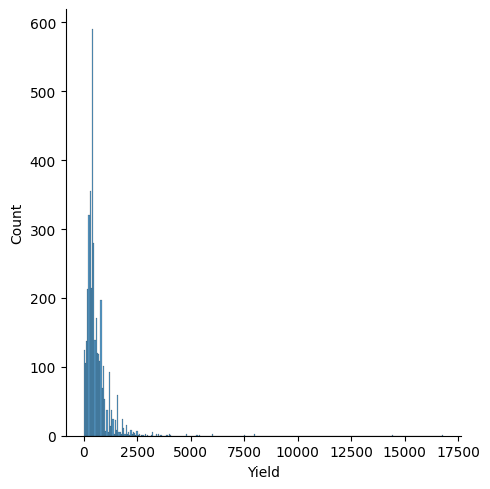

In [16]:
#Check the distribution of the outcome variable
import seaborn as sns
sns.displot(train["Yield"])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


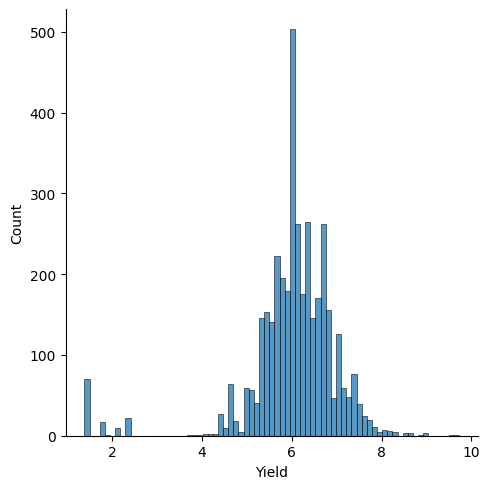

In [17]:
#See if log transformation of the outcome variable can change the distribution close to normal distribution
sns.displot(np.log(train["Yield"]))

In [18]:
test=pd.read_csv("/kaggle/input/digital-green-crop-yield-estimate-zindi/Test (1).csv")
test

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre
0,ID_F9XXEXN2ADR2,Jamui,Khaira,20,13,TractorPlough,2022-07-24,4,Manual_PuddledLine,2022-07-03,...,Broadcasting,hand,2022-12-02,500.0,2022-12-28,hand,22,10,plowed_in_soil,0.272727
1,ID_SO3VW2X4QO93,Jamui,Khaira,25,25,TractorPlough,2022-07-24,5,Manual_PuddledRandom,2022-07-08,...,Broadcasting,hand,2022-11-12,150.0,2022-12-20,machine,28,10,plowed_in_soil,0.227273
2,ID_UKUQ7JM8E894,Nalanda,Rajgir,30,30,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-07,5,Manual_PuddledRandom,2022-06-24,...,Broadcasting,hand,2022-11-24,1200.0,2022-12-05,machine,28,10,plowed_in_soil,0.281250
3,ID_QUISMWEZR2H4,Vaishali,Mahua,15,10,WetTillagePuddling TractorPlough BullockPlough...,2022-07-04,5,Manual_PuddledRandom,2022-06-20,...,SoilApplied,hand,2022-10-15,300.0,2022-10-25,hand,30,10,plowed_in_soil,0.136364
4,ID_25JGI455VKCZ,Nalanda,Rajgir,30,10,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-21,3,Manual_PuddledRandom,2022-06-24,...,Broadcasting,machine,2022-11-20,NaN,2022-11-20,machine,26,40,plowed_in_soil,0.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,ID_6MMECMX3B728,Jamui,Khaira,20,16,TractorPlough,2022-07-23,4,Manual_PuddledLine,2022-07-05,...,Broadcasting,hand,2022-12-01,1200.0,2022-12-23,hand,23,10,plowed_in_soil,0.500000
1286,ID_GZ9YGWCLLMKN,Vaishali,Mahua,25,14,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-07,5,Manual_PuddledRandom,2022-07-09,...,NaN,hand,2022-10-15,450.0,2022-10-20,hand,28,10,plowed_in_soil,0.181818
1287,ID_01YVA2LJVYBR,Vaishali,Garoul,10,3,TractorPlough,2022-07-06,6,Manual_PuddledLine,2022-06-18,...,Broadcasting,hand,2022-10-28,600.0,2022-11-12,hand,29,10,plowed_in_soil,0.136364
1288,ID_YQRL2IOUU4SZ,Jamui,Jamui,10,10,TractorPlough BullockPlough,2022-07-22,4,Manual_PuddledRandom,2022-06-18,...,Broadcasting,hand,2022-11-25,90.0,2023-01-28,hand,29,10,plowed_in_soil,0.227273


In [19]:
all_data=pd.concat([train,test])

all_data['CropTillageDate'] = pd.to_datetime(all_data['CropTillageDate'])
all_data['RcNursEstDate'] = pd.to_datetime(all_data['RcNursEstDate'])
all_data['SeedingSowingTransplanting'] = pd.to_datetime(all_data['SeedingSowingTransplanting'])
all_data['Harv_date'] = pd.to_datetime(all_data['Harv_date'])
all_data['Threshing_date'] = pd.to_datetime(all_data['Threshing_date'])

all_data["CropTillageDate_Year"]=all_data["CropTillageDate"].dt.year
all_data["CropTillageDate_Months"]=all_data["CropTillageDate"].dt.month
all_data["CropTillageDate_Days"]=all_data["CropTillageDate"].dt.day

all_data["RcNursEstDate_Year"]=all_data["RcNursEstDate"].dt.year
all_data["RcNursEstDate_Months"]=all_data["RcNursEstDate"].dt.month
all_data["RcNursEstDate_Days"]=all_data["RcNursEstDate"].dt.day


all_data["SeedingSowingTransplanting_Year"]=all_data["SeedingSowingTransplanting"].dt.year
all_data["SeedingSowingTransplanting_Months"]=all_data["SeedingSowingTransplanting"].dt.month
all_data["SeedingSowingTransplanting_Days"]=all_data["SeedingSowingTransplanting"].dt.day

all_data["Harv_date_Year"]=all_data["Harv_date"].dt.year
all_data["Harv_date_Months"]=all_data["Harv_date"].dt.month
all_data["Harv_date_Days"]=all_data["Harv_date"].dt.day

all_data["Threshing_date_Year"]=all_data["Threshing_date"].dt.year
all_data["Threshing_date_Months"]=all_data["Threshing_date"].dt.month
all_data["Threshing_date_Days"]=all_data["Threshing_date"].dt.day




In [20]:
all_data

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,RcNursEstDate_Days,SeedingSowingTransplanting_Year,SeedingSowingTransplanting_Months,SeedingSowingTransplanting_Days,Harv_date_Year,Harv_date_Months,Harv_date_Days,Threshing_date_Year,Threshing_date_Months,Threshing_date_Days
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,27.0,2022,7,21,2022,11,16,2022,11,16
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,20.0,2022,7,20,2022,11,25,2022,12,24
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,20.0,2022,8,13,2022,12,12,2023,1,11
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,17.0,2022,7,17,2022,12,2,2022,12,29
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,21.0,2022,7,20,2022,11,30,2022,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,ID_6MMECMX3B728,Jamui,Khaira,20,16,TractorPlough,2022-07-23,4,Manual_PuddledLine,2022-07-05,...,5.0,2022,7,30,2022,12,1,2022,12,23
1286,ID_GZ9YGWCLLMKN,Vaishali,Mahua,25,14,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-07,5,Manual_PuddledRandom,2022-07-09,...,9.0,2022,7,25,2022,10,15,2022,10,20
1287,ID_01YVA2LJVYBR,Vaishali,Garoul,10,3,TractorPlough,2022-07-06,6,Manual_PuddledLine,2022-06-18,...,18.0,2022,7,9,2022,10,28,2022,11,12
1288,ID_YQRL2IOUU4SZ,Jamui,Jamui,10,10,TractorPlough BullockPlough,2022-07-22,4,Manual_PuddledRandom,2022-06-18,...,18.0,2022,7,26,2022,11,25,2023,1,28


In [21]:
all_data2=all_data.drop(columns=["ID","CropTillageDate","RcNursEstDate","SeedingSowingTransplanting","Harv_date","Threshing_date","Yield"])
c_features=all_data2.columns[all_data2.dtypes==object]
c_features

Index(['District', 'Block', 'LandPreparationMethod', 'CropEstMethod',
       'NursDetFactor', 'TransDetFactor', 'TransplantingIrrigationSource',
       'TransplantingIrrigationPowerSource', 'OrgFertilizers',
       'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'MineralFertAppMethod',
       'FirstTopDressFert', 'MineralFertAppMethod.1', 'Harv_method',
       'Threshing_method', 'Stubble_use'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
for i in c_features:
    all_data2[i]=le.fit_transform(all_data2[i])

In [23]:
all_data2=all_data2.fillna(0)
all_data2

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDepth,CropEstMethod,SeedlingsPerPit,NursDetFactor,TransDetFactor,...,RcNursEstDate_Days,SeedingSowingTransplanting_Year,SeedingSowingTransplanting_Months,SeedingSowingTransplanting_Days,Harv_date_Year,Harv_date_Months,Harv_date_Days,Threshing_date_Year,Threshing_date_Months,Threshing_date_Days
0,2,7,45,40,18,5,3,2.0,11,49,...,27.0,2022,7,21,2022,11,16,2022,11,16
1,2,8,26,26,42,5,3,2.0,25,49,...,20.0,2022,7,20,2022,11,25,2022,12,24
2,0,2,10,10,18,6,3,2.0,104,145,...,20.0,2022,8,13,2022,12,12,2023,1,11
3,0,2,15,15,18,6,3,2.0,25,49,...,17.0,2022,7,17,2022,12,2,2022,12,29
4,2,7,60,60,24,4,3,2.0,11,164,...,21.0,2022,7,20,2022,11,30,2022,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,1,4,20,16,15,4,2,1.0,75,84,...,5.0,2022,7,30,2022,12,1,2022,12,23
1286,3,6,25,14,42,5,3,2.0,24,48,...,9.0,2022,7,25,2022,10,15,2022,10,20
1287,3,1,10,3,15,6,2,1.0,38,37,...,18.0,2022,7,9,2022,10,28,2022,11,12
1288,1,3,10,10,16,4,3,4.0,1,36,...,18.0,2022,7,26,2022,11,25,2023,1,28


In [24]:
train_2=all_data2[:len(train)]
test_2=all_data2[len(train):]

In [25]:
#Create a random forest model
#from sklearn.ensemble import RandomForestRegressor
#rf=RandomForestRegressor(n_jobs=4)

#Fitting the model and transforming the logarithm 
#rf.fit(train_2,np.log(train["Yield"]))
#result=rf.predict(test_2)
#result

In [26]:
#데이터 구분해서 20%만 평가 데이터로 구성 / 80%는 학습데이터로 구성
#Seperating the data to validation and train set that 20% is the validation set and 80% is the train set 

from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(train_2,np.log(train["Yield"]),test_size=0.2,random_state=42)
x_train

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDepth,CropEstMethod,SeedlingsPerPit,NursDetFactor,TransDetFactor,...,RcNursEstDate_Days,SeedingSowingTransplanting_Year,SeedingSowingTransplanting_Months,SeedingSowingTransplanting_Days,Harv_date_Year,Harv_date_Months,Harv_date_Days,Threshing_date_Year,Threshing_date_Months,Threshing_date_Days
2181,3,6,10,5,18,5,3,2.0,5,38,...,13.0,2022,7,18,2022,10,15,2022,10,27
416,1,4,20,20,15,3,3,3.0,124,71,...,30.0,2022,7,27,2022,11,20,2022,12,19
1583,3,6,6,6,42,5,3,2.0,105,162,...,13.0,2022,8,9,2022,11,6,2022,11,12
217,1,4,42,32,15,4,3,1.0,75,164,...,30.0,2022,7,30,2022,12,1,2022,12,4
888,1,3,20,15,40,4,3,4.0,0,0,...,28.0,2022,8,17,2022,11,11,2023,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2,8,20,15,27,6,1,0.0,137,169,...,3.0,2022,7,23,2022,11,28,2022,12,13
1294,3,6,12,10,18,5,3,2.0,5,38,...,12.0,2022,7,18,2022,10,13,2022,10,27
860,2,8,20,20,10,6,1,0.0,137,169,...,1.0,2022,7,20,2022,11,25,2022,12,10
3507,1,3,25,20,31,4,3,3.0,0,0,...,13.0,2022,8,6,2022,11,16,2023,1,31


In [39]:
#Boosting model
from catboost import CatBoostRegressor
cbc= CatBoostRegressor(verbose=100,iterations=10000,learning_rate=0.05)

#Setting early stopping round to improve the fit of the model 
cbc.fit(x_train,y_train,eval_set=(x_valid,y_valid),early_stopping_rounds=100)

result=cbc.predict(test_2)
result

0:	learn: 1.0019451	test: 0.9908246	best: 0.9908246 (0)	total: 5.51ms	remaining: 55.1s
100:	learn: 0.2842106	test: 0.4486506	best: 0.4486506 (100)	total: 246ms	remaining: 24.1s
200:	learn: 0.2467342	test: 0.4358890	best: 0.4357324 (198)	total: 464ms	remaining: 22.6s
300:	learn: 0.2198235	test: 0.4319313	best: 0.4319313 (300)	total: 694ms	remaining: 22.4s
400:	learn: 0.1985331	test: 0.4298186	best: 0.4298186 (400)	total: 921ms	remaining: 22s
500:	learn: 0.1832241	test: 0.4275818	best: 0.4275818 (500)	total: 1.14s	remaining: 21.7s
600:	learn: 0.1686496	test: 0.4257182	best: 0.4256583 (593)	total: 1.36s	remaining: 21.3s
700:	learn: 0.1568144	test: 0.4238071	best: 0.4237998 (699)	total: 1.58s	remaining: 21s
800:	learn: 0.1461331	test: 0.4232284	best: 0.4231456 (755)	total: 1.81s	remaining: 20.8s
900:	learn: 0.1359527	test: 0.4224487	best: 0.4224487 (900)	total: 2.03s	remaining: 20.5s
1000:	learn: 0.1267238	test: 0.4216604	best: 0.4216604 (1000)	total: 2.26s	remaining: 20.3s
1100:	learn: 0.

array([6.40403546, 6.03917502, 6.17558631, ..., 5.33703317, 5.93860828,
       5.83644527])

In [40]:
sub_3=pd.read_csv("/kaggle/input/digital-green-crop-yield-estimate-zindi/SampleSubmission (1).csv")
sub_3

,ID,Yield
0,ID_F9XXEXN2ADR2,0
1,ID_SO3VW2X4QO93,0
2,ID_UKUQ7JM8E894,0
3,ID_QUISMWEZR2H4,0
4,ID_25JGI455VKCZ,0
...,...,...
1285,ID_6MMECMX3B728,0
1286,ID_GZ9YGWCLLMKN,0
1287,ID_01YVA2LJVYBR,0
1288,ID_YQRL2IOUU4SZ,0


In [41]:
sub_3["Yield"]=np.exp(result)
sub_3

,ID,Yield
0,ID_F9XXEXN2ADR2,604.278668
1,ID_SO3VW2X4QO93,419.546776
2,ID_UKUQ7JM8E894,480.864877
3,ID_QUISMWEZR2H4,300.967656
4,ID_25JGI455VKCZ,555.457952
...,...,...
1285,ID_6MMECMX3B728,1010.093416
1286,ID_GZ9YGWCLLMKN,410.603406
1287,ID_01YVA2LJVYBR,207.895006
1288,ID_YQRL2IOUU4SZ,379.406533


In [33]:
sub_3["Yield"].max()

4500.215073874077

In [34]:
sub_3["Yield"].min()

3.4857701743770404

In [38]:
sub_3["Yield"].sort_values(ascending=True)[:50]

1067     3.485770
545      3.601614
133      3.677988
123      3.732184
125      3.800128
967      3.805355
320      3.822840
79       3.829842
434      3.866295
1248     4.028315
1031     4.035519
1102     4.379373
13       4.673958
1088     5.406524
102      5.935873
432      5.971167
440      6.223993
147      6.299986
39       6.364543
1050     6.447238
243      6.877522
733      7.757105
343      7.785534
345      9.041377
48       9.146986
382     10.168462
324     10.698019
134     11.539903
735     11.801577
486     13.201236
534     15.869105
436     43.705366
177     44.833961
1180    69.187639
1129    78.410604
1075    79.350542
623     79.632873
112     83.248280
579     87.526273
625     87.614737
1278    88.273705
316     89.318515
798     89.461251
787     90.430001
146     94.299604
286     95.895647
1224    97.839446
1069    98.497858
193     98.835082
1256    98.868142
Name: Yield, dtype: float64

In [42]:
sub_3.to_csv("sub_3.csv",index=0)